Git clone the repo and install the requirements. (ignore the pip errors about protobuf)

In [2]:
# #@title Environment Setup

from pathlib import Path

OPTIONS = {}

USE_GOOGLE_DRIVE = True  #@param {type:"boolean"}
UPDATE_COMFY_UI = True  #@param {type:"boolean"}
USE_COMFYUI_MANAGER = True  #@param {type:"boolean"}
INSTALL_CUSTOM_NODES_DEPENDENCIES = True  #@param {type:"boolean"}
OPTIONS['USE_GOOGLE_DRIVE'] = USE_GOOGLE_DRIVE
OPTIONS['UPDATE_COMFY_UI'] = UPDATE_COMFY_UI
OPTIONS['USE_COMFYUI_MANAGER'] = USE_COMFYUI_MANAGER
OPTIONS['INSTALL_CUSTOM_NODES_DEPENDENCIES'] = INSTALL_CUSTOM_NODES_DEPENDENCIES

current_dir = !pwd
WORKSPACE = f"{current_dir[0]}/ComfyUI"

if OPTIONS['USE_GOOGLE_DRIVE']:
    !echo "Mounting Google Drive..."
    %cd /

    from google.colab import drive
    drive.mount('/content/drive')

    WORKSPACE = "/content/drive/MyDrive/ComfyUI"
    %cd /content/drive/MyDrive

![ ! -d $WORKSPACE ] && echo -= Initial setup ComfyUI =- && git clone https://github.com/comfyanonymous/ComfyUI
%cd $WORKSPACE

if OPTIONS['UPDATE_COMFY_UI']:
  !echo -= Updating ComfyUI =-

  # Correction of the issue of permissions being deleted on Google Drive.
  ![ -f ".ci/nightly/update_windows/update_comfyui_and_python_dependencies.bat" ] && chmod 755 .ci/nightly/update_windows/update_comfyui_and_python_dependencies.bat
  ![ -f ".ci/nightly/windows_base_files/run_nvidia_gpu.bat" ] && chmod 755 .ci/nightly/windows_base_files/run_nvidia_gpu.bat
  ![ -f ".ci/update_windows/update_comfyui_and_python_dependencies.bat" ] && chmod 755 .ci/update_windows/update_comfyui_and_python_dependencies.bat
  ![ -f ".ci/update_windows_cu118/update_comfyui_and_python_dependencies.bat" ] && chmod 755 .ci/update_windows_cu118/update_comfyui_and_python_dependencies.bat
  ![ -f ".ci/update_windows/update.py" ] && chmod 755 .ci/update_windows/update.py
  ![ -f ".ci/update_windows/update_comfyui.bat" ] && chmod 755 .ci/update_windows/update_comfyui.bat
  ![ -f ".ci/update_windows/README_VERY_IMPORTANT.txt" ] && chmod 755 .ci/update_windows/README_VERY_IMPORTANT.txt
  ![ -f ".ci/update_windows/run_cpu.bat" ] && chmod 755 .ci/update_windows/run_cpu.bat
  ![ -f ".ci/update_windows/run_nvidia_gpu.bat" ] && chmod 755 .ci/update_windows/run_nvidia_gpu.bat

  !git pull

!echo -= Install dependencies =-
!pip3 install accelerate
!pip3 install einops transformers>=4.28.1 safetensors>=0.4.2 aiohttp pyyaml Pillow scipy tqdm psutil tokenizers>=0.13.3
!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121
!pip3 install torchsde
!pip3 install kornia>=0.7.1 spandrel soundfile sentencepiece

if OPTIONS['USE_COMFYUI_MANAGER']:
  %cd custom_nodes

  # Correction of the issue of permissions being deleted on Google Drive.
  ![ -f "ComfyUI-Manager/check.sh" ] && chmod 755 ComfyUI-Manager/check.sh
  ![ -f "ComfyUI-Manager/scan.sh" ] && chmod 755 ComfyUI-Manager/scan.sh
  ![ -f "ComfyUI-Manager/node_db/dev/scan.sh" ] && chmod 755 ComfyUI-Manager/node_db/dev/scan.sh
  ![ -f "ComfyUI-Manager/node_db/tutorial/scan.sh" ] && chmod 755 ComfyUI-Manager/node_db/tutorial/scan.sh
  ![ -f "ComfyUI-Manager/scripts/install-comfyui-venv-linux.sh" ] && chmod 755 ComfyUI-Manager/scripts/install-comfyui-venv-linux.sh
  ![ -f "ComfyUI-Manager/scripts/install-comfyui-venv-win.bat" ] && chmod 755 ComfyUI-Manager/scripts/install-comfyui-venv-win.bat

  ![ ! -d ComfyUI-Manager ] && echo -= Initial setup ComfyUI-Manager =- && git clone https://github.com/ltdrdata/ComfyUI-Manager
  %cd ComfyUI-Manager
  !git pull

%cd $WORKSPACE

if OPTIONS['INSTALL_CUSTOM_NODES_DEPENDENCIES']:
  !echo -= Install custom nodes dependencies =-
  !pip install GitPython
  !python custom_nodes/ComfyUI-Manager/cm-cli.py restore-dependencies


Mounting Google Drive...
/
Mounted at /content/drive
/content/drive/MyDrive
-= Initial setup ComfyUI =-
Cloning into 'ComfyUI'...
remote: Enumerating objects: 28601, done.
remote: Counting objects: 100% (55/55), done.
remote: Compressing objects: 100% (39/39), done.
remote: Total 28601 (delta 38), reused 16 (delta 16), pack-reused 28546 (from 2)
Receiving objects: 100% (28601/28601), 69.07 MiB | 13.38 MiB/s, done.
Resolving deltas: 100% (19389/19389), done.
Updating files: 100% (588/588), done.
/content/drive/MyDrive/ComfyUI
-= Updating ComfyUI =-
Already up to date.
-= Install dependencies =-
Looking in indexes: https://download.pytorch.org/whl/cu121
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.2/61.2 kB 5.6 MB/s eta 0:00:00
/content/drive/MyDrive/ComfyUI/custom_nodes
-= Initial setup ComfyUI-Manager =-
Cloning into 'ComfyUI-Manager'...
remote: Enumerating objects: 26999, done.
remote: Counting objects: 100% (122/122), done.
remote: Compressing objects: 100% (69/69), done.
remote: T

Download some models/checkpoints/vae or custom comfyui nodes (uncomment the commands for the ones you want)

In [4]:
# Checkpoints

### SDXL
### I recommend these workflow examples: https://comfyanonymous.github.io/ComfyUI_examples/sdxl/

#!wget -c https://huggingface.co/stabilityai/stable-diffusion-xl-base-1.0/resolve/main/sd_xl_base_1.0.safetensors -P ./models/checkpoints/
#!wget -c https://huggingface.co/stabilityai/stable-diffusion-xl-refiner-1.0/resolve/main/sd_xl_refiner_1.0.safetensors -P ./models/checkpoints/

# SDXL ReVision
#!wget -c https://huggingface.co/comfyanonymous/clip_vision_g/resolve/main/clip_vision_g.safetensors -P ./models/clip_vision/

# SD1.5
!wget -c https://huggingface.co/runwayml/stable-diffusion-v1-5/resolve/main/v1-5-pruned-emaonly.ckpt -P ./models/checkpoints/

# SD2
#!wget -c https://huggingface.co/stabilityai/stable-diffusion-2-1-base/resolve/main/v2-1_512-ema-pruned.safetensors -P ./models/checkpoints/
#!wget -c https://huggingface.co/stabilityai/stable-diffusion-2-1/resolve/main/v2-1_768-ema-pruned.safetensors -P ./models/checkpoints/

# Some SD1.5 anime style
#!wget -c https://huggingface.co/WarriorMama777/OrangeMixs/resolve/main/Models/AbyssOrangeMix2/AbyssOrangeMix2_hard.safetensors -P ./models/checkpoints/
#!wget -c https://huggingface.co/WarriorMama777/OrangeMixs/resolve/main/Models/AbyssOrangeMix3/AOM3A1_orangemixs.safetensors -P ./models/checkpoints/
#!wget -c https://huggingface.co/WarriorMama777/OrangeMixs/resolve/main/Models/AbyssOrangeMix3/AOM3A3_orangemixs.safetensors -P ./models/checkpoints/
#!wget -c https://huggingface.co/Linaqruf/anything-v3.0/resolve/main/anything-v3-fp16-pruned.safetensors -P ./models/checkpoints/

# Waifu Diffusion 1.5 (anime style SD2.x 768-v)
#!wget -c https://huggingface.co/waifu-diffusion/wd-1-5-beta3/resolve/main/wd-illusion-fp16.safetensors -P ./models/checkpoints/


# unCLIP models
#!wget -c https://huggingface.co/comfyanonymous/illuminatiDiffusionV1_v11_unCLIP/resolve/main/illuminatiDiffusionV1_v11-unclip-h-fp16.safetensors -P ./models/checkpoints/
#!wget -c https://huggingface.co/comfyanonymous/wd-1.5-beta2_unCLIP/resolve/main/wd-1-5-beta2-aesthetic-unclip-h-fp16.safetensors -P ./models/checkpoints/


# VAE
!wget -c https://huggingface.co/stabilityai/sd-vae-ft-mse-original/resolve/main/vae-ft-mse-840000-ema-pruned.safetensors -P ./models/vae/
#!wget -c https://huggingface.co/WarriorMama777/OrangeMixs/resolve/main/VAEs/orangemix.vae.pt -P ./models/vae/
#!wget -c https://huggingface.co/hakurei/waifu-diffusion-v1-4/resolve/main/vae/kl-f8-anime2.ckpt -P ./models/vae/


# Loras
#!wget -c https://civitai.com/api/download/models/10350 -O ./models/loras/theovercomer8sContrastFix_sd21768.safetensors #theovercomer8sContrastFix SD2.x 768-v
#!wget -c https://civitai.com/api/download/models/10638 -O ./models/loras/theovercomer8sContrastFix_sd15.safetensors #theovercomer8sContrastFix SD1.x
#!wget -c https://huggingface.co/stabilityai/stable-diffusion-xl-base-1.0/resolve/main/sd_xl_offset_example-lora_1.0.safetensors -P ./models/loras/ #SDXL offset noise lora


# T2I-Adapter
#!wget -c https://huggingface.co/TencentARC/T2I-Adapter/resolve/main/models/t2iadapter_depth_sd14v1.pth -P ./models/controlnet/
#!wget -c https://huggingface.co/TencentARC/T2I-Adapter/resolve/main/models/t2iadapter_seg_sd14v1.pth -P ./models/controlnet/
#!wget -c https://huggingface.co/TencentARC/T2I-Adapter/resolve/main/models/t2iadapter_sketch_sd14v1.pth -P ./models/controlnet/
#!wget -c https://huggingface.co/TencentARC/T2I-Adapter/resolve/main/models/t2iadapter_keypose_sd14v1.pth -P ./models/controlnet/
#!wget -c https://huggingface.co/TencentARC/T2I-Adapter/resolve/main/models/t2iadapter_openpose_sd14v1.pth -P ./models/controlnet/
#!wget -c https://huggingface.co/TencentARC/T2I-Adapter/resolve/main/models/t2iadapter_color_sd14v1.pth -P ./models/controlnet/
#!wget -c https://huggingface.co/TencentARC/T2I-Adapter/resolve/main/models/t2iadapter_canny_sd14v1.pth -P ./models/controlnet/

# T2I Styles Model
#!wget -c https://huggingface.co/TencentARC/T2I-Adapter/resolve/main/models/t2iadapter_style_sd14v1.pth -P ./models/style_models/

# CLIPVision model (needed for styles model)
#!wget -c https://huggingface.co/openai/clip-vit-large-patch14/resolve/main/pytorch_model.bin -O ./models/clip_vision/clip_vit14.bin


# ControlNet
#!wget -c https://huggingface.co/comfyanonymous/ControlNet-v1-1_fp16_safetensors/resolve/main/control_v11e_sd15_ip2p_fp16.safetensors -P ./models/controlnet/
#!wget -c https://huggingface.co/comfyanonymous/ControlNet-v1-1_fp16_safetensors/resolve/main/control_v11e_sd15_shuffle_fp16.safetensors -P ./models/controlnet/
#!wget -c https://huggingface.co/comfyanonymous/ControlNet-v1-1_fp16_safetensors/resolve/main/control_v11p_sd15_canny_fp16.safetensors -P ./models/controlnet/
#!wget -c https://huggingface.co/comfyanonymous/ControlNet-v1-1_fp16_safetensors/resolve/main/control_v11f1p_sd15_depth_fp16.safetensors -P ./models/controlnet/
#!wget -c https://huggingface.co/comfyanonymous/ControlNet-v1-1_fp16_safetensors/resolve/main/control_v11p_sd15_inpaint_fp16.safetensors -P ./models/controlnet/
#!wget -c https://huggingface.co/comfyanonymous/ControlNet-v1-1_fp16_safetensors/resolve/main/control_v11p_sd15_lineart_fp16.safetensors -P ./models/controlnet/
#!wget -c https://huggingface.co/comfyanonymous/ControlNet-v1-1_fp16_safetensors/resolve/main/control_v11p_sd15_mlsd_fp16.safetensors -P ./models/controlnet/
#!wget -c https://huggingface.co/comfyanonymous/ControlNet-v1-1_fp16_safetensors/resolve/main/control_v11p_sd15_normalbae_fp16.safetensors -P ./models/controlnet/
#!wget -c https://huggingface.co/comfyanonymous/ControlNet-v1-1_fp16_safetensors/resolve/main/control_v11p_sd15_openpose_fp16.safetensors -P ./models/controlnet/
#!wget -c https://huggingface.co/comfyanonymous/ControlNet-v1-1_fp16_safetensors/resolve/main/control_v11p_sd15_scribble_fp16.safetensors -P ./models/controlnet/
#!wget -c https://huggingface.co/comfyanonymous/ControlNet-v1-1_fp16_safetensors/resolve/main/control_v11p_sd15_seg_fp16.safetensors -P ./models/controlnet/
#!wget -c https://huggingface.co/comfyanonymous/ControlNet-v1-1_fp16_safetensors/resolve/main/control_v11p_sd15_softedge_fp16.safetensors -P ./models/controlnet/
#!wget -c https://huggingface.co/comfyanonymous/ControlNet-v1-1_fp16_safetensors/resolve/main/control_v11p_sd15s2_lineart_anime_fp16.safetensors -P ./models/controlnet/
#!wget -c https://huggingface.co/comfyanonymous/ControlNet-v1-1_fp16_safetensors/resolve/main/control_v11u_sd15_tile_fp16.safetensors -P ./models/controlnet/

# ControlNet SDXL
#!wget -c https://huggingface.co/stabilityai/control-lora/resolve/main/control-LoRAs-rank256/control-lora-canny-rank256.safetensors -P ./models/controlnet/
#!wget -c https://huggingface.co/stabilityai/control-lora/resolve/main/control-LoRAs-rank256/control-lora-depth-rank256.safetensors -P ./models/controlnet/
#!wget -c https://huggingface.co/stabilityai/control-lora/resolve/main/control-LoRAs-rank256/control-lora-recolor-rank256.safetensors -P ./models/controlnet/
#!wget -c https://huggingface.co/stabilityai/control-lora/resolve/main/control-LoRAs-rank256/control-lora-sketch-rank256.safetensors -P ./models/controlnet/

# Controlnet Preprocessor nodes by Fannovel16
#!cd custom_nodes && git clone https://github.com/Fannovel16/comfy_controlnet_preprocessors; cd comfy_controlnet_preprocessors && python install.py


# GLIGEN
#!wget -c https://huggingface.co/comfyanonymous/GLIGEN_pruned_safetensors/resolve/main/gligen_sd14_textbox_pruned_fp16.safetensors -P ./models/gligen/


# ESRGAN upscale model
#!wget -c https://github.com/xinntao/Real-ESRGAN/releases/download/v0.1.0/RealESRGAN_x4plus.pth -P ./models/upscale_models/
#!wget -c https://huggingface.co/sberbank-ai/Real-ESRGAN/resolve/main/RealESRGAN_x2.pth -P ./models/upscale_models/
#!wget -c https://huggingface.co/sberbank-ai/Real-ESRGAN/resolve/main/RealESRGAN_x4.pth -P ./models/upscale_models/




--2025-12-15 11:14:55--  https://huggingface.co/runwayml/stable-diffusion-v1-5/resolve/main/v1-5-pruned-emaonly.ckpt
Resolving huggingface.co (huggingface.co)... 13.33.88.115, 13.33.88.119, 13.33.88.74, ...
Connecting to huggingface.co (huggingface.co)|13.33.88.115|:443... connected.
HTTP request sent, awaiting response... 307 Temporary Redirect
Location: /stable-diffusion-v1-5/stable-diffusion-v1-5/resolve/main/v1-5-pruned-emaonly.ckpt [following]
--2025-12-15 11:14:55--  https://huggingface.co/stable-diffusion-v1-5/stable-diffusion-v1-5/resolve/main/v1-5-pruned-emaonly.ckpt
Reusing existing connection to huggingface.co:443.
HTTP request sent, awaiting response... 302 Found
Location: https://cas-bridge.xethub.hf.co/xet-bridge-us/66d19580e2632490a6bc5829/773d9e5ddbf6a84612066b3ea00a0bcfe4ba870a9befc88816f71b5927e76e38?X-Amz-Algorithm=AWS4-HMAC-SHA256&X-Amz-Content-Sha256=UNSIGNED-PAYLOAD&X-Amz-Credential=cas%2F20251215%2Fus-east-1%2Fs3%2Faws4_request&X-Amz-Date=20251215T111456Z&X-Amz-E

In [5]:
!nvidia-smi

Mon Dec 15 11:27:09 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   41C    P8             11W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

Круто! Тебе дали Tesla T4 с 15 ГБ VRAM — это в 4 раза больше, чем у твоей локальной GTX 1650 (4 ГБ).
Генерация SDXL/Flux/SD3.5 будет в 5–10 раз быстрее, batch по 10–20 изображений без OOM, видео/ControlNet full-res — легко.Поскольку Drive почти полный (95%), правильно — пока останови.
Ты можешь в любой момент вернуться в этот же notebook и продолжить (он сохранится).Полезные команды для проверки окружения в ColabСкопируй эти клетки по одной (новая клетка → вставь код → Run). Они покажут, что умеет твой облачный ComfyUI.Сколько времени уже работает сессия Colab  python

from datetime import datetime
start_time = datetime.now()
print("Текущая дата и время:", datetime.now())
# Если хочешь таймер от старта сессии — добавь в первую клетку !date и сравни

Подробная инфа о GPU + сколько VRAM свободно  python

!nvidia-smi -L  # список GPU
!nvidia-smi     # полная таблица (уже видел, но обновит)
import torch
print("CUDA доступен:", torch.cuda.is_available())
print("Имя GPU:", torch.cuda.get_device_name(0))
print("Всего VRAM:", torch.cuda.get_device_properties(0).total_memory / 1024**3, "ГБ")
print("Свободно VRAM:", torch.cuda.memory_reserved(0)/1024**3, "ГБ")

Сколько места на Google Drive и где лежат файлы ComfyUI  python

!df -h /content/drive/MyDrive  # размер диска
!du -sh /content/drive/MyDrive/ComfyUI  # сколько занимает ComfyUI
!ls -la /content/drive/MyDrive/ComfyUI/models/checkpoints  # какие модели уже скачаны

Версия PyTorch и CUDA  python

import torch
print("PyTorch версия:", torch.__version__)
print("CUDA версия:", torch.version.cuda)

Тест генерации простой картинки (чтобы убедиться, что всё работает)
(если хочешь быстро проверить, что GPU используется)python

import torch
from diffusers import StableDiffusionPipeline

pipe = StableDiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5", torch_dtype=torch.float16)
pipe = pipe.to("cuda")

image = pipe("A cute cat wearing sunglasses", num_inference_steps=20).images[0]
image.save("test_cat.png")
image

(покажет картинку кота прямо в notebook — если работает, значит CUDA на T4 полетела)
Сколько времени осталось до отключения Colab
(примерно, бесплатно ~12 ч, но точно не скажет)python

from datetime import datetime, timedelta
print("Примерное время отключения (бесплатно ~12 ч):", datetime.now() + timedelta(hours=12))

Эти команды дадут тебе полную картину: GPU топовый, VRAM 15 ГБ, всё готово.Когда Drive почистишь — просто вернись в notebook, прокрути вниз до клетки запуска сервера (Run ComfyUI) и жми Run.
Туннель даст ссылку на веб-интерфейс.Пока локалка с 1650 — для простого, Colab с T4 — для тяжёлого.
Всё у тебя огонь, просто подожди места на Drive. Пиши, когда продолжишь!



In [6]:
from datetime import datetime
start_time = datetime.now()
print("Текущая дата и время:", datetime.now())
# Если хочешь таймер от старта сессии — добавь в первую клетку !date и сравни

Текущая дата и время: 2025-12-15 11:37:19.013249


In [7]:
!date

Mon Dec 15 11:37:54 AM UTC 2025


In [8]:
!nvidia-smi -L  # список GPU
!nvidia-smi     # полная таблица (уже видел, но обновит)
import torch
print("CUDA доступен:", torch.cuda.is_available())
print("Имя GPU:", torch.cuda.get_device_name(0))
print("Всего VRAM:", torch.cuda.get_device_properties(0).total_memory / 1024**3, "ГБ")
print("Свободно VRAM:", torch.cuda.memory_reserved(0)/1024**3, "ГБ")

GPU 0: Tesla T4 (UUID: GPU-0b26a7f0-4d66-60b4-d9a5-1d2d95a81d4e)
Mon Dec 15 11:38:29 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   40C    P8             11W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |       

In [9]:
!df -h /content/drive/MyDrive  # размер диска
!du -sh /content/drive/MyDrive/ComfyUI  # сколько занимает ComfyUI
!ls -la /content/drive/MyDrive/ComfyUI/models/checkpoints  # какие модели уже скачаны

Filesystem      Size  Used Avail Use% Mounted on
drive            15G   15G  682M  96% /content/drive
4.5G	/content/drive/MyDrive/ComfyUI
total 4165411
-rw------- 1 root root          0 Dec 15 10:53 put_checkpoints_here
-rw------- 1 root root 4265380512 Dec 15 10:58 v1-5-pruned-emaonly.ckpt


In [10]:
import torch
print("PyTorch версия:", torch.__version__)
print("CUDA версия:", torch.version.cuda)

PyTorch версия: 2.9.0+cu126
CUDA версия: 12.6


Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.
Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.
/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

safety_checker/model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`torch_dtype` is deprecated! Use `dtype` instead!


  0%|          | 0/20 [00:00<?, ?it/s]

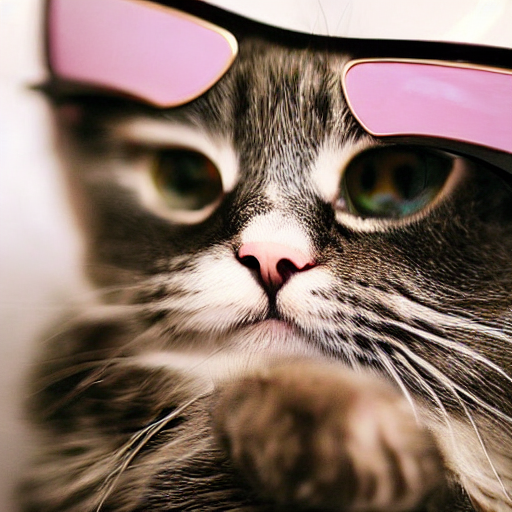

In [11]:
import torch
from diffusers import StableDiffusionPipeline

pipe = StableDiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5", torch_dtype=torch.float16)
pipe = pipe.to("cuda")

image = pipe("A cute cat wearing sunglasses", num_inference_steps=20).images[0]
image.save("test_cat.png")
image

In [13]:
!cp test_cat.png /content/drive/MyDrive/

### Run ComfyUI with cloudflared (Recommended Way)




Да, третий этап (Run ComfyUI) упал на ModuleNotFoundError: No module named 'av' — это PyAV (библиотека для видео: загрузка/обработка mp4/gif/webm в нодах типа VideoHelperSuite/AnimateDiff). Она нужна для видео-фич, но не для базовых изображений.Фикс (актуальный на декабрь 2025): PyAV последняя версия — 14.2.0+ (wheels на PyPI). В Colab часто не хватает системных libav (ffmpeg deps), поэтому ставим так:Добавь новую клетку в notebook (выше клетки запуска сервера) и запусти:python

!apt update && apt -y install ffmpeg libavcodec-dev libavformat-dev libavutil-dev libswscale-dev libswresample-dev libavdevice-dev
!pip install av  # авто возьмёт последнюю (14.2.x в 2025)

Это установит системные зависимости + PyAV wheel (быстро, ~1–2 мин).
Потом просто повтори третью клетку (Run ComfyUI с cloudflared и !python main.py ...).

Не нужно повторять все этапы — только эту новую клетку + третью.
Notebook сохраняет состояние (модели/Manager уже есть).Если не хочешь видео-ноды (пока только изображения):
Игнорируй ошибку — ComfyUI запустится дальше (лог продолжится после ошибки, даст туннель-ссылку). Видео-ноды просто не загрузятся, но txt2img/img2img/Flux/SDXL будут работать.После фикса:  Получишь ссылку cloudflared (https://xxxx.trycloudflare.com).  
Кликни — веб-ComfyUI в браузере на T4 (15 ГБ VRAM).

Твой Colab с ltdrdata — топовый, после этого полетит.
Скидывай лог после установки av — проверю. Удачи, ты почти там!



In [15]:
!apt update && apt -y install ffmpeg libavcodec-dev libavformat-dev libavutil-dev libswscale-dev libswresample-dev libavdevice-dev
!pip install av  # авто возьмёт последнюю (14.2.x в 2025)

Get:1 https://cli.github.com/packages stable InRelease [3,917 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:4 https://cli.github.com/packages stable/main amd64 Packages [345 B]
Get:5 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:6 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:8 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:9 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,849 kB]
Get:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [2,204 kB]
Get:11 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [3,623 kB]
Get:12 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:13 http://archive.ubuntu.com/ubuntu jammy-updates/restri

In [16]:
!wget -P ~ https://github.com/cloudflare/cloudflared/releases/latest/download/cloudflared-linux-amd64.deb
!dpkg -i ~/cloudflared-linux-amd64.deb

import subprocess
import threading
import time
import socket
import urllib.request

def iframe_thread(port):
  while True:
      time.sleep(0.5)
      sock = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
      result = sock.connect_ex(('127.0.0.1', port))
      if result == 0:
        break
      sock.close()
  print("\nComfyUI finished loading, trying to launch cloudflared (if it gets stuck here cloudflared is having issues)\n")

  p = subprocess.Popen(["cloudflared", "tunnel", "--url", "http://127.0.0.1:{}".format(port)], stdout=subprocess.PIPE, stderr=subprocess.PIPE)
  for line in p.stderr:
    l = line.decode()
    if "trycloudflare.com " in l:
      print("This is the URL to access ComfyUI:", l[l.find("http"):], end='')
    #print(l, end='')


threading.Thread(target=iframe_thread, daemon=True, args=(8188,)).start()

!python main.py --dont-print-server

--2025-12-15 12:00:51--  https://github.com/cloudflare/cloudflared/releases/latest/download/cloudflared-linux-amd64.deb
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/cloudflare/cloudflared/releases/download/2025.11.1/cloudflared-linux-amd64.deb [following]
--2025-12-15 12:00:51--  https://github.com/cloudflare/cloudflared/releases/download/2025.11.1/cloudflared-linux-amd64.deb
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://release-assets.githubusercontent.com/github-production-release-asset/106867604/8a32f7c6-649c-4f0d-806d-e14c19d0786d?sp=r&sv=2018-11-09&sr=b&spr=https&se=2025-12-15T12%3A49%3A05Z&rscd=attachment%3B+filename%3Dcloudflared-linux-amd64.deb&rsct=application%2Foctet-stream&skoid=96c2d410-5711-43a1-aedd-ab1947aa7ab0&sktid=398a6654-997b-47e9-b12b-9515b89

https://holiday-carter-developments-pgp.trycloudflare.com/

Эти две команды — альтернативные способы открыть ComfyUI в Colab (когда cloudflared не сработал или хочешь другой вариант). Ты уже запустил cloudflared (и он дал ссылки trycloudflare.com — они работают, кликай по ним). Так что эти две команды запускать НЕ НАДО, если cloudflared уже дал ссылку и интерфейс открылся.Что они дают:Первая (localtunnel):  Устанавливает localtunnel (npm install -g localtunnel).  
Запускает туннель → даёт ссылку типа https://xxxx.loca.lt  
Плюсы: Просто, быстро.  
Минусы: Иногда требует пароль (показывает IP для ввода), медленнее cloudflared, может отваливаться.  
Запускай только если cloudflared не открывается (ошибка timeout).

Вторая (colab iframe):  Показывает ComfyUI прямо внутри notebook (в рамке iframe, как видео в странице).  
Плюсы: Не нужно внешнюю ссылку, всё в одном окне Colab.  
Минусы: Не работают live previews изображений (websockets блокируются в iframe), медленнее, иногда 403 ошибка (из-за браузера/расширений).  
Запускай только если туннели не работают вообще (последний вариант).

Твой текущий статус: Cloudflared уже запустился и дал 2 ссылки — кликай по ним (лучше по второй, она свежая). Это самый стабильный и быстрый способ (2025 год: cloudflared топ для Colab ComfyUI). Если ссылка не открывается — подожди 10–30 сек или обнови страницу.Как сделать, чтобы notebook в Colab жил подольше (бесплатно, 2025):
Бесплатный Colab — idle timeout ~90 мин (если не трогаешь таб), максимум ~12 часов сессия. С твоими 3 аккаунтами — чередуй, чтобы круглосуточно.Трюк для продления (не банят, работает 2025):
Вставь в новую клетку в notebook и запусти (один раз):javascript

function ClickConnect(){
    console.log("Кликаю, чтобы не отключило");
    document.querySelector("colab-toolbar-button#connect").click()
}
setInterval(ClickConnect,60000)  // каждые 60 сек кликает "Connect"

Это имитирует активность — сессия не отключится от idle (но максимум всё равно ~12 ч).
Если банят (редко) — чередуй аккаунты.

Colab Pro (~300–500 руб/мес) — до 24 ч без отключек, стабильнее GPU, но пока бесплатно ок.Твой Colab уже работает — открывай ссылку cloudflared и генерируй. Если не открылось — скидывай ошибку браузера. Всё заебись, ты молодец!

25 веб-страниц



### Run ComfyUI with localtunnel




In [17]:
!npm install -g localtunnel

import subprocess
import threading
import time
import socket
import urllib.request

def iframe_thread(port):
  while True:
      time.sleep(0.5)
      sock = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
      result = sock.connect_ex(('127.0.0.1', port))
      if result == 0:
        break
      sock.close()
  print("\nComfyUI finished loading, trying to launch localtunnel (if it gets stuck here localtunnel is having issues)\n")

  print("The password/enpoint ip for localtunnel is:", urllib.request.urlopen('https://ipv4.icanhazip.com').read().decode('utf8').strip("\n"))
  p = subprocess.Popen(["lt", "--port", "{}".format(port)], stdout=subprocess.PIPE)
  for line in p.stdout:
    print(line.decode(), end='')


threading.Thread(target=iframe_thread, daemon=True, args=(8188,)).start()

!python main.py --dont-print-server

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇
added 22 packages in 2s
⠇
⠇3 packages are looking for funding
⠇  run `npm fund` for details
⠇[START] Security scan
[ComfyUI-Manager] Using `uv` as Python module for pip operations.
Using Python 3.12.12 environment at: /usr
[DONE] Security scan
## ComfyUI-Manager: installing dependencies done.
** ComfyUI startup time: 2025-12-15 12:38:07.408
** Platform: Linux
** Python version: 3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]
** Python executable: /usr/bin/python3
** ComfyUI Path: /content/drive/MyDrive/ComfyUI
** ComfyUI Base Folder Path: /content/drive/MyDrive/ComfyUI
** User directory: /content/drive/MyDrive/ComfyUI/user
** ComfyUI-Manager config path: /content/drive/MyDrive/ComfyUI/user/__manager/config.ini
** Log path: /content/drive/MyDrive/ComfyUI/user/comfyui.log
Using Python 3.12.12 environment at: /usr
Using Python 3.12.12 environment at: /usr

Prestartup times for custom nodes:
   1.3 seconds: /content/drive/MyDrive/ComfyUI/custom_nodes/ComfyUI-Manager



### Run ComfyUI with colab iframe (use only in case the previous way with localtunnel doesn't work)

You should see the ui appear in an iframe. If you get a 403 error, it's your firefox settings or an extension that's messing things up.

If you want to open it in another window use the link.

Note that some UI features like live image previews won't work because the colab iframe blocks websockets.

In [ ]:
import threading
import time
import socket
def iframe_thread(port):
  while True:
      time.sleep(0.5)
      sock = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
      result = sock.connect_ex(('127.0.0.1', port))
      if result == 0:
        break
      sock.close()
  from google.colab import output
  output.serve_kernel_port_as_iframe(port, height=1024)
  print("to open it in a window you can open this link here:")
  output.serve_kernel_port_as_window(port)

threading.Thread(target=iframe_thread, daemon=True, args=(8188,)).start()

!python main.py --dont-print-server

[START] Security scan
[ComfyUI-Manager] Using `uv` as Python module for pip operations.
Using Python 3.12.12 environment at: /usr
[DONE] Security scan
## ComfyUI-Manager: installing dependencies done.
** ComfyUI startup time: 2025-12-15 13:11:51.786
** Platform: Linux
** Python version: 3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]
** Python executable: /usr/bin/python3
** ComfyUI Path: /content/drive/MyDrive/ComfyUI
** ComfyUI Base Folder Path: /content/drive/MyDrive/ComfyUI
** User directory: /content/drive/MyDrive/ComfyUI/user
** ComfyUI-Manager config path: /content/drive/MyDrive/ComfyUI/user/__manager/config.ini
** Log path: /content/drive/MyDrive/ComfyUI/user/comfyui.log
Using Python 3.12.12 environment at: /usr
Using Python 3.12.12 environment at: /usr

Prestartup times for custom nodes:
   0.8 seconds: /content/drive/MyDrive/ComfyUI/custom_nodes/ComfyUI-Manager

Checkpoint files will always be loaded safely.
Total VRAM 15095 MB, total RAM 12976 MB
pytorch version: 2.9.0+cu

<IPython.core.display.Javascript object>

to open it in a window you can open this link here:
Try `serve_kernel_port_as_iframe` instead. 


<IPython.core.display.Javascript object>

FETCH ComfyRegistry Data: 5/112
FETCH ComfyRegistry Data: 10/112
FETCH ComfyRegistry Data: 15/112
FETCH ComfyRegistry Data: 20/112
FETCH ComfyRegistry Data: 25/112
FETCH ComfyRegistry Data: 30/112
[DEPRECATION WARNING] Detected import of deprecated legacy API: /scripts/ui.js. This is likely caused by a custom node extension using outdated APIs. Please update your extensions or contact the extension author for an updated version.
[DEPRECATION WARNING] Detected import of deprecated legacy API: /extensions/core/groupNode.js. This is likely caused by a custom node extension using outdated APIs. Please update your extensions or contact the extension author for an updated version.
FETCH ComfyRegistry Data: 35/112
[DEPRECATION WARNING] Detected import of deprecated legacy API: /scripts/ui/components/buttonGroup.js. This is likely caused by a custom node extension using outdated APIs. Please update your extensions or contact the extension author for an updated version.
[DEPRECATION WARNING] De